In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer , KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df = df.drop('loan_id' , axis=1)

## Ten random rows

In [4]:
# Set random seed for reproducibility
np.random.seed(42)
random_rows = df.sample(n=10)
random_rows

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1703,5,Graduate,No,5400000,19700000,20,423,6500000,10000000,15700000,7300000,Rejected
1173,2,Graduate,No,5900000,14000000,8,599,4700000,9500000,17800000,6700000,Approved
308,3,Graduate,No,9600000,19900000,14,452,4200000,16200000,28500000,6600000,Rejected
1322,2,Graduate,No,6200000,23400000,8,605,10000000,10800000,21800000,9200000,Approved
3271,3,Not Graduate,Yes,5800000,14100000,12,738,11700000,4400000,15400000,8400000,Approved
3539,4,Graduate,Yes,4700000,12500000,8,678,13700000,200000,9800000,7000000,Approved
1522,4,Graduate,No,3400000,13500000,12,705,10000000,1100000,8300000,4900000,Approved
3399,5,Not Graduate,Yes,5100000,13700000,14,527,12100000,8900000,19400000,4700000,Rejected
1402,3,Graduate,Yes,3300000,8500000,12,586,7500000,5100000,7800000,3900000,Approved
1829,1,Not Graduate,Yes,3000000,6000000,16,518,3800000,1700000,11600000,3900000,Rejected


### Checking the general info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [6]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### No missing values

### Checking if there is any duplicated values

In [7]:
df.duplicated().sum()

0

### check if there are 0s where 0 is meaningless

In [8]:
for i in df.columns:
    print(i,len(df[df[i] == 0]))

 no_of_dependents 712
 education 0
 self_employed 0
 income_annum 0
 loan_amount 0
 loan_term 0
 cibil_score 0
 residential_assets_value 45
 commercial_assets_value 107
 luxury_assets_value 0
 bank_asset_value 8
 loan_status 0


I think residential_assets_value and commercial_assets_value columns shouldn't contain zero values 

### check the count of each category in Categorical columns 

In [9]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].value_counts()}")

 education:  education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
 self_employed:  self_employed
Yes    2150
No     2119
Name: count, dtype: int64
 loan_status:  loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


### The dataset is imbalanced

## changing zeroes with Nan in those two columns

In [10]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

damn :|

column names have blank spaces inside them 

# Removing spaces in column names 

In [11]:
# remove space in column names using strip() function
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [12]:
#replace "?" with Nan
df.loc[: , ['residential_assets_value', 'commercial_assets_value']]= df.loc[: , ["residential_assets_value", "commercial_assets_value"]].replace({0: None})
# Replace 'None' values with NaN
df.fillna(value=np.nan, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6260\980621627.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2400000 2700000 7100000 ... 1200000 8200000 17800000]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[: , ['residential_assets_value', 'commercial_assets_value']]= df.loc[: , ["residential_assets_value", "commercial_assets_value"]].replace({0: None})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6260\980621627.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[17600000 2200000 4500000 ... 12400000 700000 11800000]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[: , ['residential_assets_value', 'commercial_assets_value']]= df.loc[: , ["residential_assets_value", "commercial_assets_value"]].replace({0: None})
C:\Users\Lenovo\AppData\Local

In [13]:
df.isnull().sum()

no_of_dependents              0
education                     0
self_employed                 0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value     45
commercial_assets_value     107
luxury_assets_value           0
bank_asset_value              0
loan_status                   0
dtype: int64

In [14]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in df.columns if df[cname].dtype in ["string",'object'] ]
# Select numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

## Data visualization

### plotting some histogram 

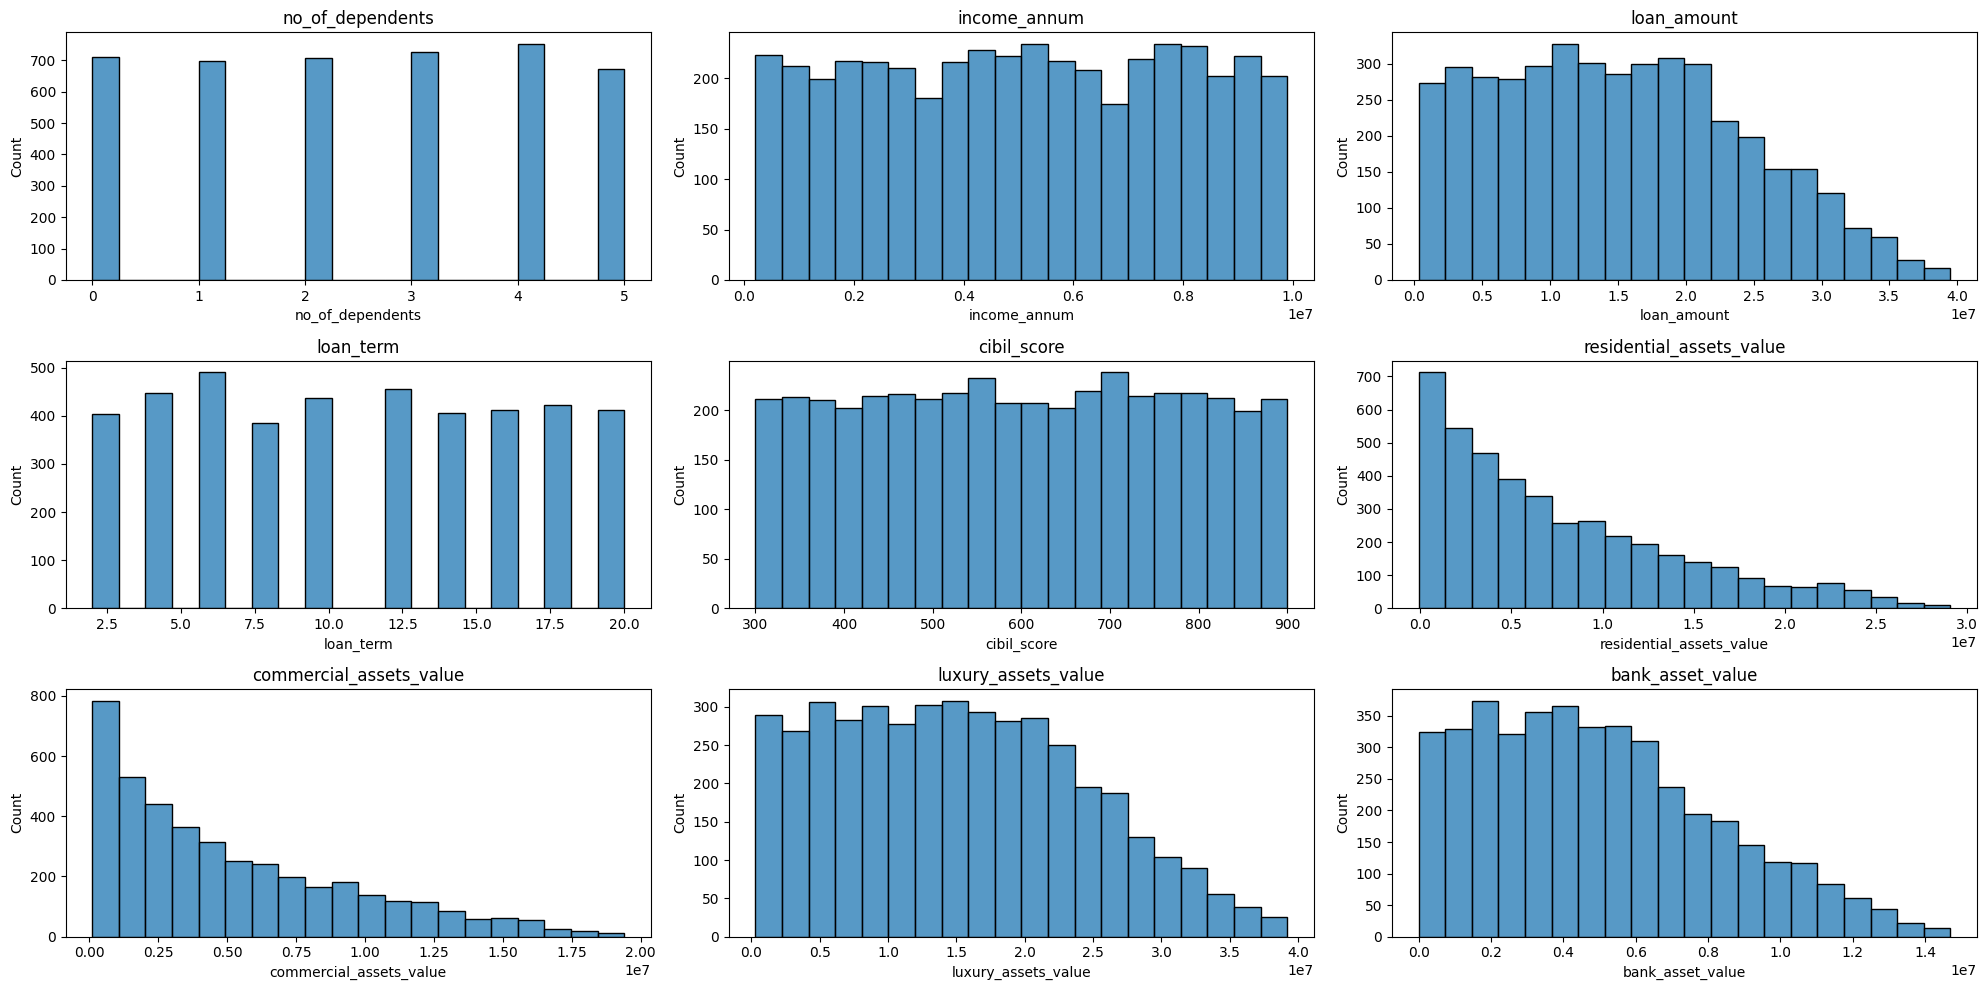

In [15]:
# Calculate the number of rows and columns needed for subplots
num_rows = 3
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.loc[:, numerical_cols]):
    sns.histplot(df[col], ax=axes[i], bins=20)
    axes[i].set_title(col)  # Set the title to the column name

# Hide any remaining empty subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


actually, no_of_dependents and loan_term are categorical 

## Box plot for the numerical columns 

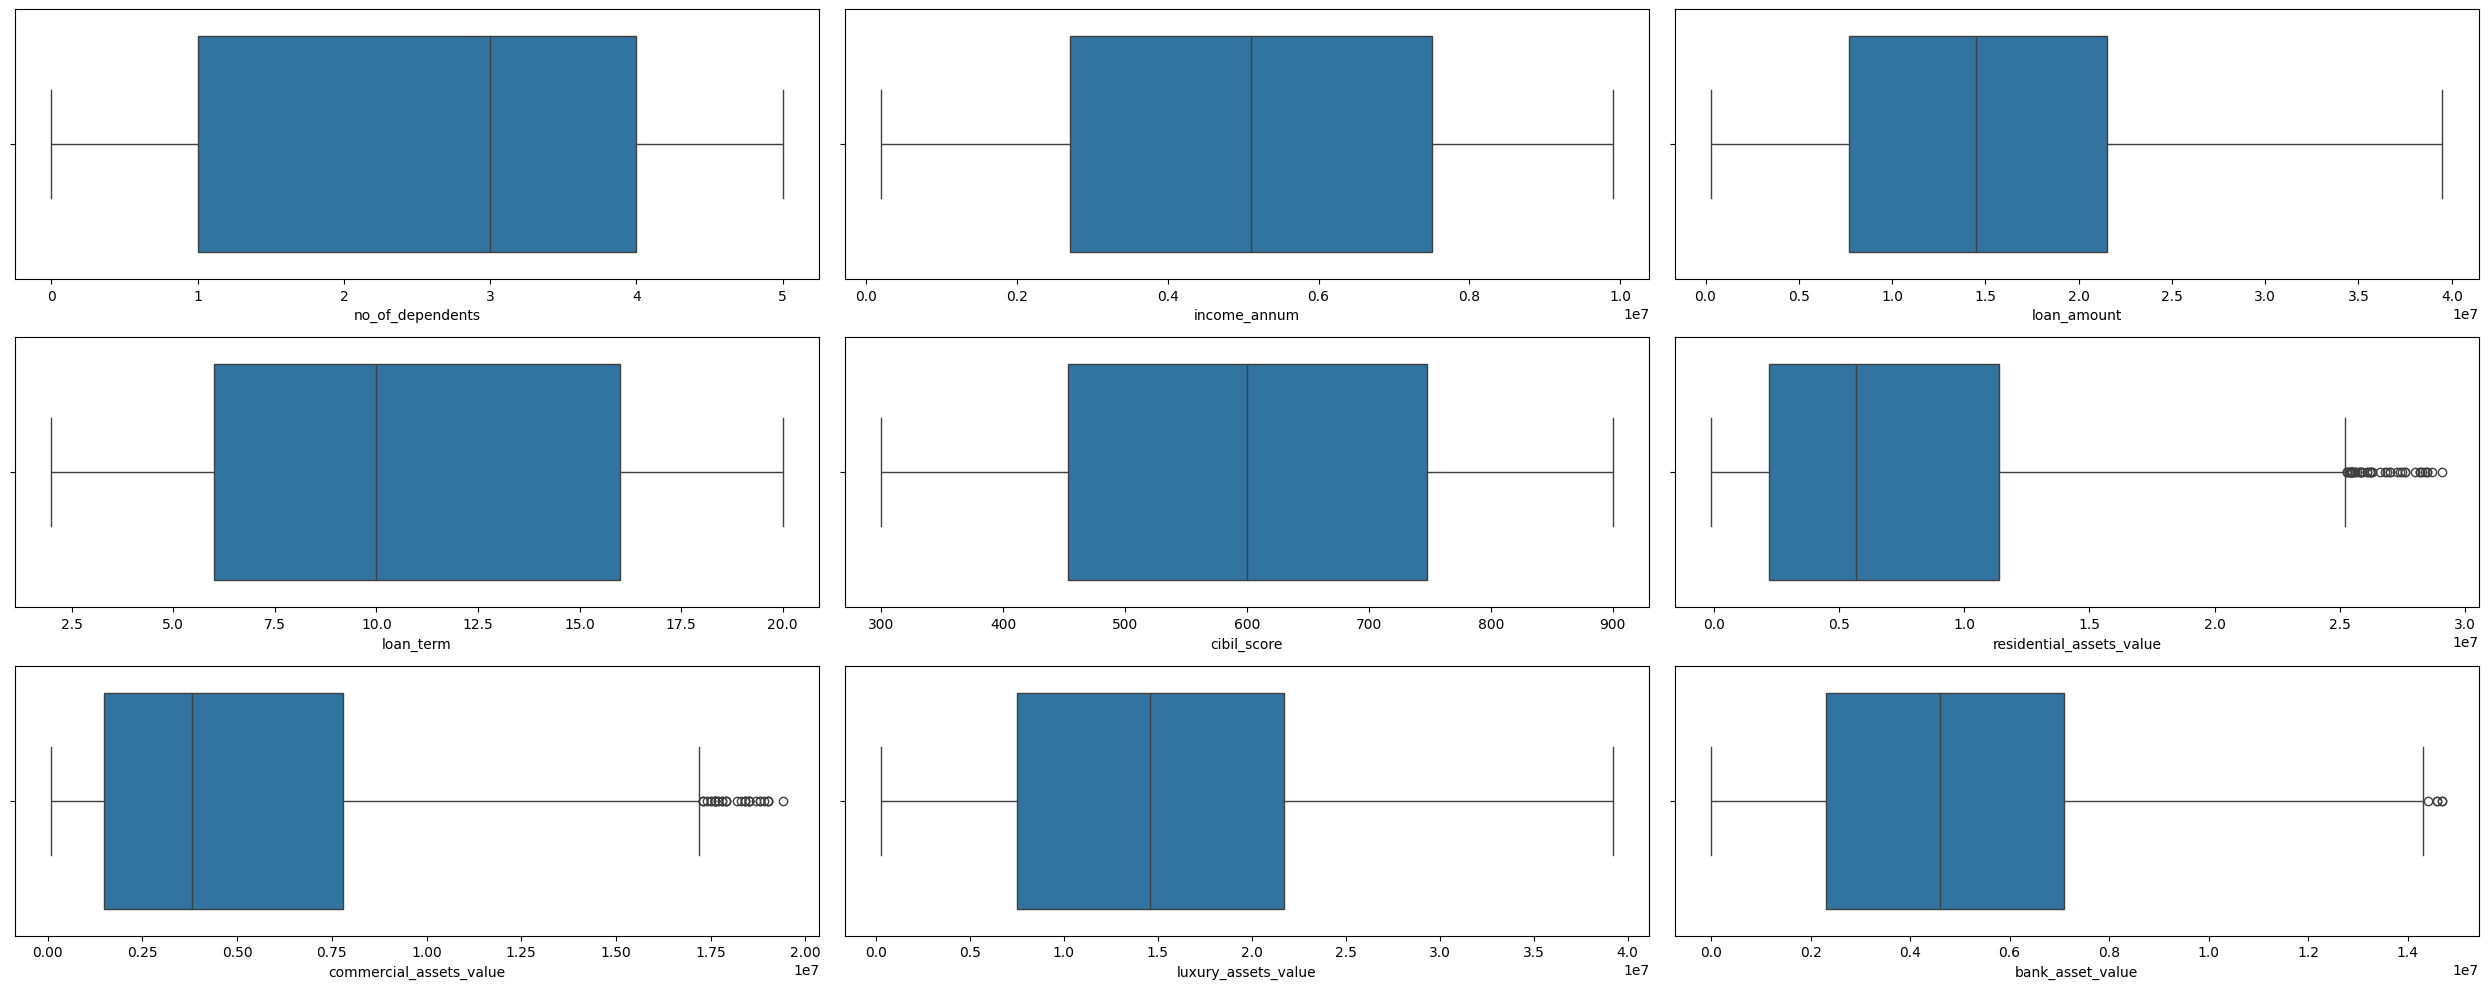

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows and columns needed for subplots
num_rows = 3
num_cols = 3  # Number of numerical columns in your DataFrame

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 10))

# Plot boxplots for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i // num_cols, i % num_cols])  # Adjusted indexing

# Set labels for each subplot
for i, col in enumerate(numerical_cols):
    axes[i // num_cols, i % num_cols].set_xlabel(col)  # Adjusted indexing

# Hide any remaining empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


### Correlation matrix 

In [17]:
# One-hot encode the 'ocean_proximity' column
one_hot_encoded = pd.get_dummies(df.loc[: ,categorical_cols], dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), one_hot_encoded ], axis=1)


# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()


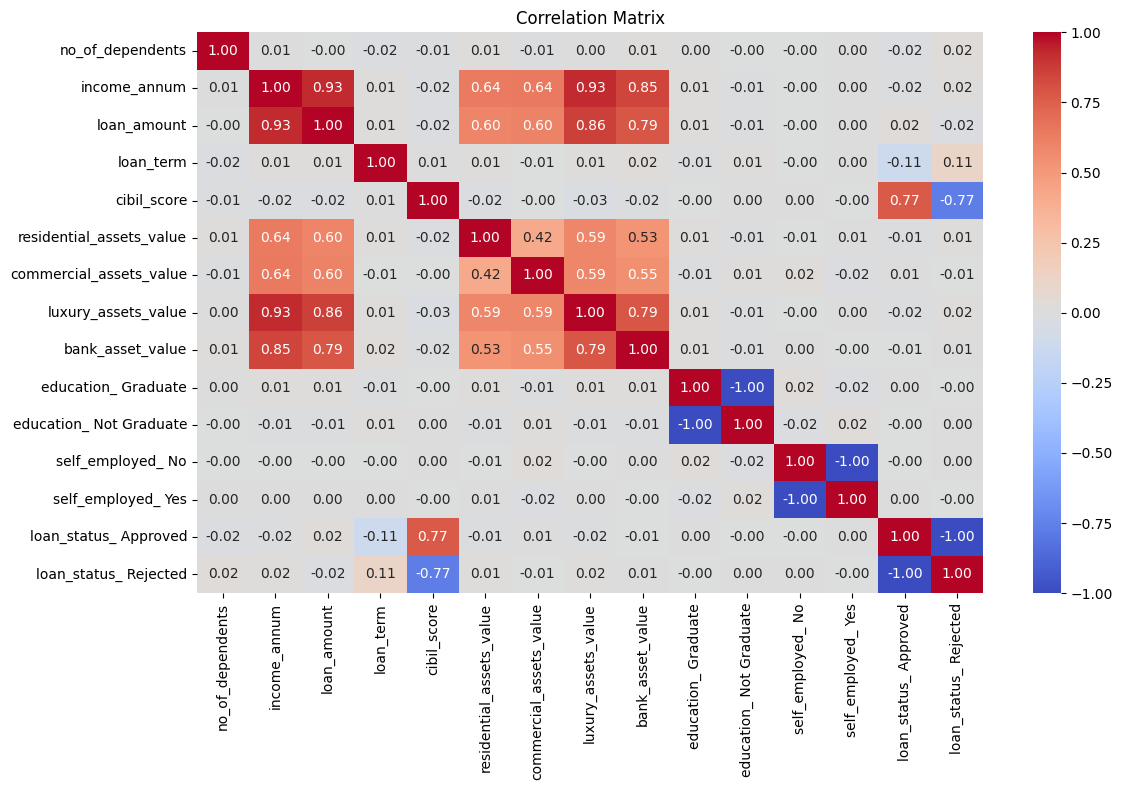

In [18]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title('Correlation Matrix')
plt.tight_layout()  # Adjust layout parameters to ensure all elements are fully visible
plt.show()



There are some obvious correlations but other columns are completely independent 

In [19]:
df["loan_status"] = df["loan_status"].map({" Approved": 1 , " Rejected": 0})


In [20]:
df["education"] = df["education"].map({" Graduate": 1 , " Not Graduate": 0})
df["self_employed"] = df["self_employed"].map({" Yes": 1 , " No": 0})

## Outlier detection 

I will use IQR outlier detection

In [21]:
# Handling outliers using the IQR method
def handle_outliers_with_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -  IQR
    upper_bound = Q3 +  IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for col in numerical_cols:
    handle_outliers_with_IQR(df, col)

In [22]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000.0,14100000.0,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000.0,4500000.0,33300000,11900000,0
3,3,1,0,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000.0,500000.0,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000.0,2900000.0,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000.0,12400000.0,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000.0,700000.0,14100000,5800000,1


## It looks like there's no outlier in the dataset, even with a tight 1 IQR range

## Missing values imputation 

I will use two methods for impute the missing values 
- using median 
- using Iterative imputer

I will evaluate each method by using a random forest classifier and calculating the accuracy. <br>
the method with more accuracy will be choosen 

## Train Test split 

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(["loan_status"], axis=1), df["loan_status"], train_size=0.6, test_size=0.4,random_state=0)
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname !="loan_status"]

## Iterative Imputer

In [24]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler())
])

In [25]:
# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
    ])

In [26]:
# Fit and transform the data using the ColumnTransformer
X_train = preprocessor.fit_transform(X_train)

In [27]:
X_valid = preprocessor.transform(X_valid)

In [28]:
sm = SMOTE(random_state=2)

print("\nClass 1 before Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 before Over Sampling --> ", sum(y_train == 0))

X_train, y_train = sm.fit_resample(X_train, y_train)

print("\nThe shape of X after Over Sampling -->", X_train.shape)
print("\nThe shape of Y after Over Sampling -->", y_train.shape)

print("\nClass 1 after Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 after Over Sampling --> ", sum(y_train == 0))
print("\n")


Class 1 before Over Sampling -->  1612

Class 0 before Over Sampling -->  949

The shape of X after Over Sampling --> (3224, 11)

The shape of Y after Over Sampling --> (3224,)

Class 1 after Over Sampling -->  1612

Class 0 after Over Sampling -->  1612




In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [30]:
# Fit the regressor to your training data
model.fit(X_train, y_train)
# Make predictions on new data
y_pred = model.predict(X_valid)

In [31]:
r2 = accuracy_score(y_valid, y_pred)
print("accuracy Score:", r2)

accuracy Score: 0.974824355971897


## Using KNN

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(["loan_status"], axis=1), df["loan_status"], train_size=0.6, test_size=0.4,random_state=0)

In [33]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=60)),
    ('scaler', StandardScaler())
])

In [34]:
# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
    ])

In [35]:
# Fit and transform the data using the ColumnTransformer
X_train = preprocessor.fit_transform(X_train)

In [36]:
X_valid = preprocessor.transform(X_valid)

In [37]:
sm = SMOTE(random_state=2)

print("\nClass 1 before Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 before Over Sampling --> ", sum(y_train == 0))

X_train, y_train = sm.fit_resample(X_train, y_train)

print("\nThe shape of X after Over Sampling -->", X_train.shape)
print("\nThe shape of Y after Over Sampling -->", y_train.shape)

print("\nClass 1 after Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 after Over Sampling --> ", sum(y_train == 0))
print("\n")


Class 1 before Over Sampling -->  1612

Class 0 before Over Sampling -->  949

The shape of X after Over Sampling --> (3224, 11)

The shape of Y after Over Sampling --> (3224,)

Class 1 after Over Sampling -->  1612

Class 0 after Over Sampling -->  1612




In [38]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [39]:
# Fit the regressor to your training data
model.fit(X_train, y_train)
# Make predictions on new data
y_pred = model.predict(X_valid)

In [40]:
r2 = accuracy_score(y_valid, y_pred)
print("accuracy Score:", r2)

accuracy Score: 0.9754098360655737


## KNN is slightly better 

In [41]:
# Create a SimpleImputer object with strategy='mean'
imputer = KNNImputer(n_neighbors=60)
columns = df.columns
# Fit the imputer on the column with missing values and transform the DataFrame
df= pd.DataFrame(imputer.fit_transform(df) , columns=columns)

In [43]:
df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## It's feature selection time 

### I'm gonna use SelectKBest 

In [47]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

k_best_selector = SelectKBest(score_func=f_classif, k=9)  # Select top 9 features
X_best_features = k_best_selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

In [48]:
selected_features


Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [49]:
df = df.loc[: , np.append(selected_features,'loan_status')]

In [50]:
df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,14100000.0,22700000.0,8000000.0,1.0
1,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,0.0
2,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,11900000.0,0.0
3,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,0.0
4,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4264,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,0.0
4265,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,1.0
4266,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,0.0
4267,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,1.0


## Now we are good to go for model training

## A default DT first 

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(["loan_status"], axis=1), df["loan_status"], train_size=0.8, test_size=0.2,random_state=0)

In [54]:
sm = SMOTE(random_state=2)

print("\nClass 1 before Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 before Over Sampling --> ", sum(y_train == 0))

X_train, y_train = sm.fit_resample(X_train, y_train)

print("\nThe shape of X after Over Sampling -->", X_train.shape)
print("\nThe shape of Y after Over Sampling -->", y_train.shape)

print("\nClass 1 after Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 after Over Sampling --> ", sum(y_train == 0))
print("\n")


Class 1 before Over Sampling -->  2133

Class 0 before Over Sampling -->  1282

The shape of X after Over Sampling --> (4266, 9)

The shape of Y after Over Sampling --> (4266,)

Class 1 after Over Sampling -->  2133

Class 0 after Over Sampling -->  2133




In [57]:
pipeline = Pipeline(
    steps=[
        ('scaler' , StandardScaler()),
        ("model" , DecisionTreeClassifier())
    ]
)

In [58]:
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_valid)

In [64]:
report = classification_report(y_valid, preds)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       331
         1.0       0.97      0.98      0.98       523

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



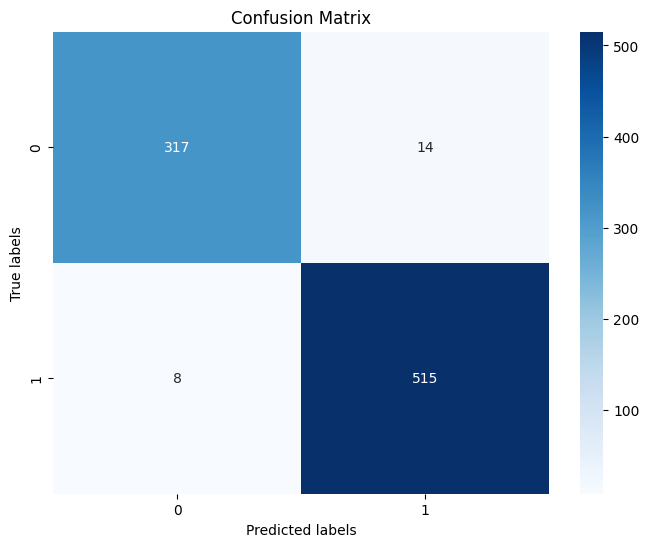

In [66]:
cm = confusion_matrix(y_valid, preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Hyper parameter optimization via grid search 

In [72]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(["loan_status"], axis=1), df["loan_status"], train_size=0.8, test_size=0.2,random_state=0)

In [73]:
sm = SMOTE(random_state=2)

print("\nClass 1 before Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 before Over Sampling --> ", sum(y_train == 0))

X_train, y_train = sm.fit_resample(X_train, y_train)

print("\nThe shape of X after Over Sampling -->", X_train.shape)
print("\nThe shape of Y after Over Sampling -->", y_train.shape)

print("\nClass 1 after Over Sampling --> ", sum(y_train == 1))
print("\nClass 0 after Over Sampling --> ", sum(y_train == 0))
print("\n")


Class 1 before Over Sampling -->  2133

Class 0 before Over Sampling -->  1282

The shape of X after Over Sampling --> (4266, 9)

The shape of Y after Over Sampling --> (4266,)

Class 1 after Over Sampling -->  2133

Class 0 after Over Sampling -->  2133




In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid= scaler.transform(X_valid)

In [92]:
parameters = dict(
                     criterion = ['gini', 'entropy'],
                     max_depth = [2,4,6,8,10,12]

)

In [93]:
model = DecisionTreeClassifier()

In [94]:
clf_GS = GridSearchCV(model, parameters)

In [95]:
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [96]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 12


In [97]:
model = DecisionTreeClassifier(criterion='gini' , max_depth=12)

In [98]:
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=12)

In [100]:
preds = model.predict(X_valid)

In [101]:
report = classification_report(y_valid, preds)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       331
         1.0       0.97      0.99      0.98       523

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

